disks: 990.0749095ms
lvl: 1475.658248ms
lines: 903.273881ms


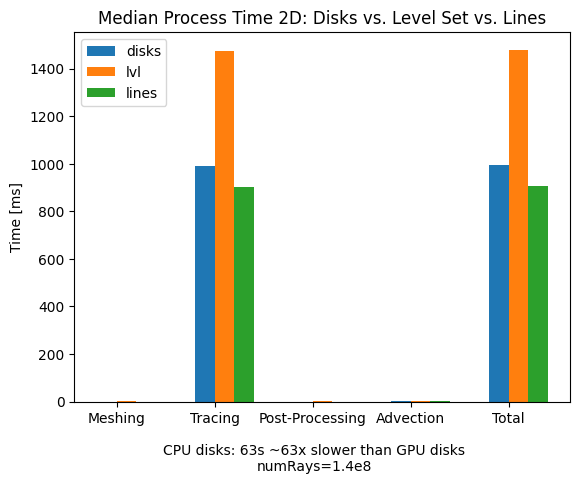

In [3]:
import matplotlib.pyplot as plt
import numpy as np

processSteps = 10

files = ["disks", "lvl", "lines"]
labels = ['Meshing', 'Tracing', 'Post-Processing', 'Advection', 'Total']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, file in enumerate(files):
  data = np.loadtxt(f'data/GPU_Benchmark/{file}2D.txt', delimiter=';', skiprows=1)[:processSteps, 1:5]
  median = np.median(data, axis=0)
  total = np.sum(median)
  medianWithTotal = np.append(median, total)
  print(f"{file}: {medianWithTotal[1] / 1e6}ms")
  bars = ax.bar(x + i * width, medianWithTotal * 1e-6, width, label=file)

ax.set_ylabel('Time [ms]')
ax.set_title('Median Process Time 2D: Disks vs. Level Set vs. Lines')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.figtext(0.5, -0.03,
            "CPU disks: 63s ~63x slower than GPU disks\nnumRays=1.4e8",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('bench_compare_2D.png', bbox_inches="tight")
plt.show()

disks: 1874.4126655ms
lvl: 1538.698289ms
trig: 746.7308935ms


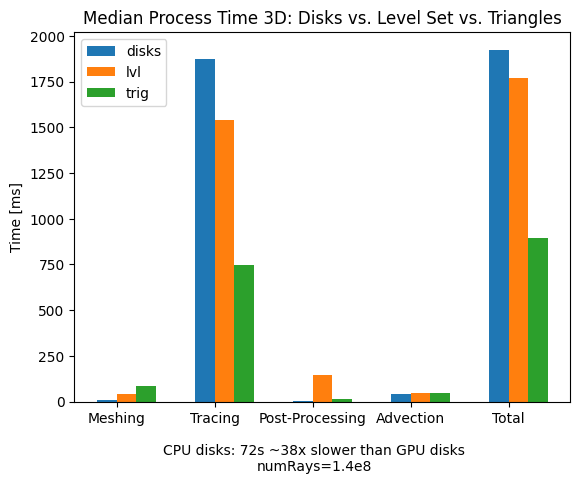

In [4]:
import matplotlib.pyplot as plt
import numpy as np

processSteps = 10

files = ["disks", "lvl", "trig"]
labels = ['Meshing', 'Tracing', 'Post-Processing', 'Advection', 'Total']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, file in enumerate(files):
  data = np.loadtxt(f'data/GPU_Benchmark/{file}3D.txt', delimiter=';', skiprows=1)[:processSteps, 1:5]
  median = np.median(data, axis=0)
  total = np.sum(median)
  medianWithTotal = np.append(median, total)
  print(f"{file}: {medianWithTotal[1] / 1e6}ms")
  bars = ax.bar(x + i * width, medianWithTotal * 1e-6, width, label=file)

ax.set_ylabel('Time [ms]')
ax.set_title('Median Process Time 3D: Disks vs. Level Set vs. Triangles')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.figtext(0.5, -0.03,
            "CPU disks: 72s ~38x slower than GPU disks\nnumRays=1.4e8",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('bench_compare_3D.png', bbox_inches="tight")
plt.show()